In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Print versions to ensure compatibility
print('Numpy version:', np.__version__)
print('TensorFlow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)


Numpy version: 1.26.4
TensorFlow version: 2.16.1
Keras version: 3.3.3


In [9]:
# Data path
data_dir = 'S:\\6th semi\\EC9170 Deep Learning\\project\\Real and Fake Face Detection Dataset_2\\Real and Fake Face Detection Dataset'

# Image data generator with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.3
)

valid_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

# Train and validation generators
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = valid_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 1429 images belonging to 2 classes.
Found 612 images belonging to 2 classes.


In [8]:
# Define the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
cnn_model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
cnn_history = cnn_model.fit(train_generator, epochs=30, validation_data=validation_generator)


C:\Users\MSI\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 46s 906ms/step - accuracy: 0.5114 - loss: 0.7018 - val_accuracy: 0.5294 - val_loss: 0.6947
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 37s 747ms/step - accuracy: 0.5222 - loss: 0.6931 - val_accuracy: 0.5049 - val_loss: 0.6930
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 39s 798ms/step - accuracy: 0.5494 - loss: 0.6888 - val_accuracy: 0.5147 - val_loss: 0.6937
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 38s 776ms/step - accuracy: 0.5211 - loss: 0.6901 - val_accuracy: 0.5294 - val_loss: 0.7093
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 36s 743ms/step - accuracy: 0.5175 - loss: 0.6972 - val_accuracy: 0.5229 - val_loss: 0.6955
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 37s 749ms/step - accuracy: 0.5410 - loss: 0.6870 - val_accuracy: 0.5163 - val_loss: 0.6946
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 37s 762ms/step - accuracy: 0.5676 - loss: 0.6827 - val_accuracy: 0.5294 - val_loss: 0.6946
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 37s 755ms/step - accuracy: 0.5712 - loss: 0.6866 - val_accu

In [6]:
# Load the VGG16 model
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers
for layer in vgg_base.layers:
    layer.trainable = False

# Add custom layers on top of VGG16 base
vgg_model = Sequential([
    vgg_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
vgg_model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
vgg_history = vgg_model.fit(train_generator, epochs=30, validation_data=validation_generator)


Epoch 1/30


C:\Users\MSI\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.5281 - loss: 0.7610 - val_accuracy: 0.5327 - val_loss: 0.7685
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.6271 - loss: 0.6751 - val_accuracy: 0.5719 - val_loss: 0.7137
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.6290 - loss: 0.6575 - val_accuracy: 0.5376 - val_loss: 0.7246
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.6270 - loss: 0.6429 - val_accuracy: 0.5539 - val_loss: 0.7468
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.6595 - loss: 0.6124 - val_accuracy: 0.5752 - val_loss: 0.7171
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.6974 - loss: 0.5842 - val_accuracy: 0.5637 - val_loss: 0.7141
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.6526 - loss: 0.5969 - val_accuracy: 0.5605 - val_loss: 0.7306
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.6758 - loss: 0.5990 - val_accuracy: 0.5654 - val_loss: 0.7322
Ep

In [10]:
# Evaluate the models
cnn_eval = cnn_model.evaluate(validation_generator)
vgg_eval = vgg_model.evaluate(validation_generator)

# Predict and generate classification reports
cnn_pred = cnn_model.predict(validation_generator)
vgg_pred = vgg_model.predict(validation_generator)

# Convert predictions to binary
cnn_pred_binary = (cnn_pred > 0.5).astype('int32')
vgg_pred_binary = (vgg_pred > 0.5).astype('int32')

print('CNN Model Evaluation:')
print(classification_report(validation_generator.classes, cnn_pred_binary))
print(confusion_matrix(validation_generator.classes, cnn_pred_binary))

print('VGG16 Model Evaluation:')
print(classification_report(validation_generator.classes, vgg_pred_binary))
print(confusion_matrix(validation_generator.classes, vgg_pred_binary))


20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 340ms/step - accuracy: 0.5305 - loss: 0.7135
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5885 - loss: 0.7844
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 338ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step
CNN Model Evaluation:
              precision    recall  f1-score   support

           0       0.48      0.39      0.43       288
           1       0.54      0.64      0.58       324

    accuracy                           0.52       612
   macro avg       0.51      0.51      0.51       612
weighted avg       0.51      0.52      0.51       612

[[111 177]
 [118 206]]
VGG16 Model Evaluation:
              precision    recall  f1-score   support

           0       0.50      0.36      0.42       288
           1       0.54      0.67      0.60       324

    accuracy                           0.53       612
   macro avg       0.52      0.52      0.51       612
weighted avg       0.52      0.53      0.52       612

[[105 183]
 [107 217]]


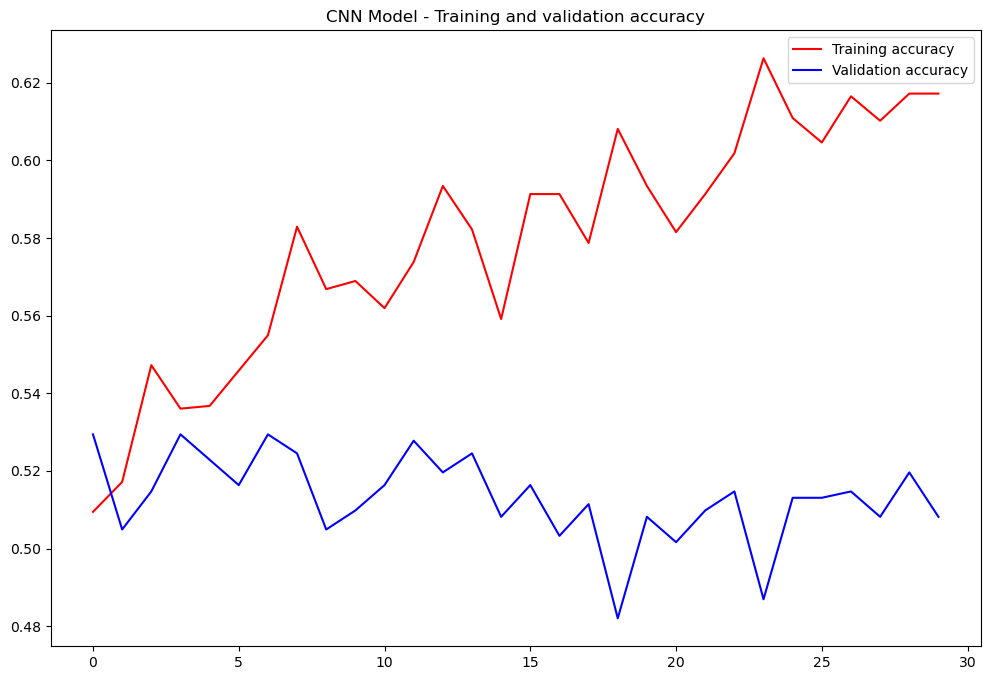

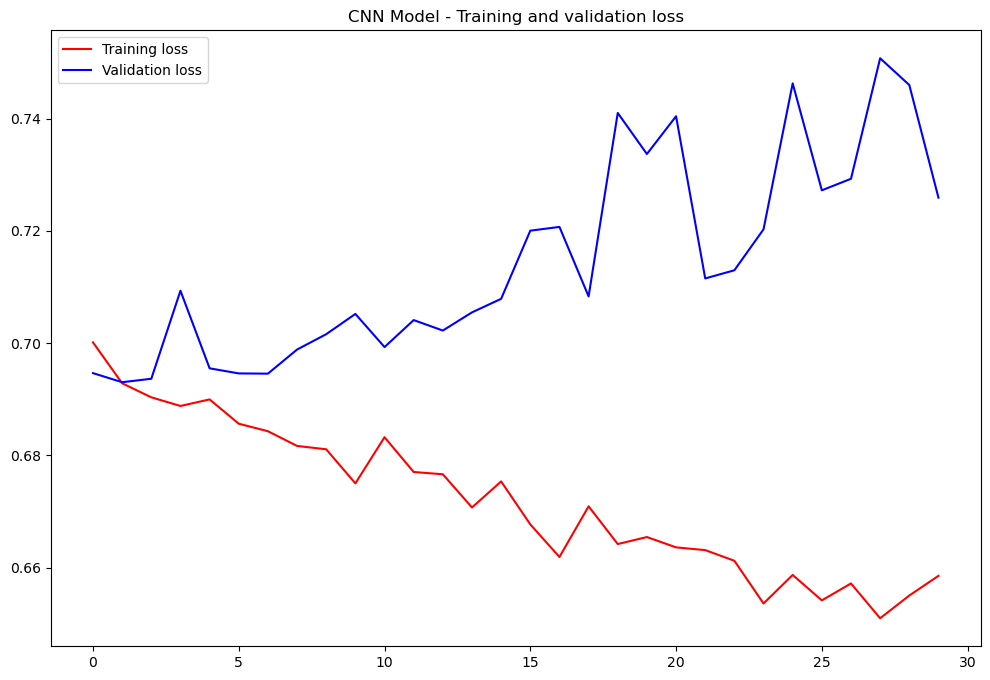

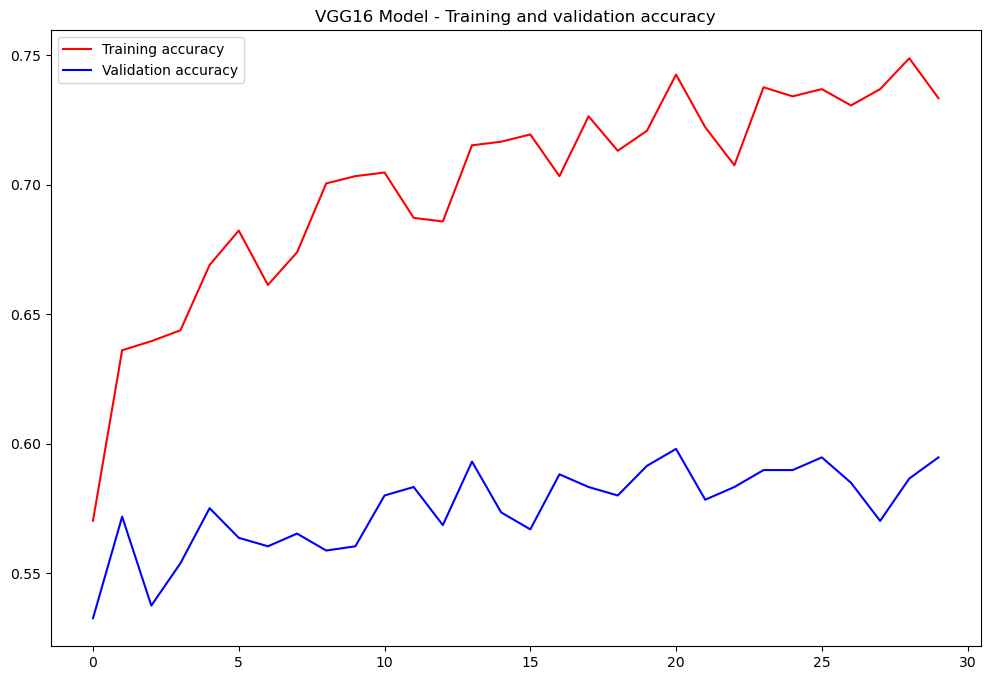

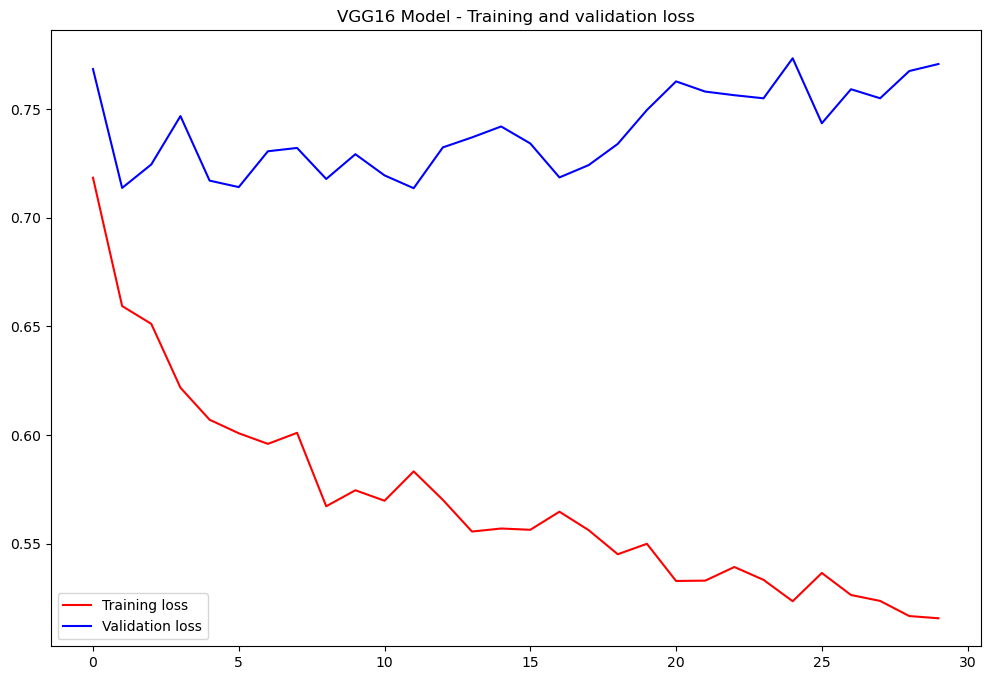

In [11]:
# Plot training & validation accuracy and loss values
def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(12, 8))
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title(f'{title} - Training and validation accuracy')
    plt.legend()

    plt.figure(figsize=(12, 8))
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title(f'{title} - Training and validation loss')
    plt.legend()
    plt.show()

plot_history(cnn_history, 'CNN Model')
plot_history(vgg_history, 'VGG16 Model')
